In [15]:
import os
from six import string_types
import numpy as np
import pandas as pd
from skimage import io
from glob import glob
from tqdm import tqdm
import cv2
import random

from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

%matplotlib inline


In [2]:
CROWTHER_ROOT = os.path.abspath("../data/EE_data")
CROWTHER_DIR = os.path.join(CROWTHER_ROOT, 'train_RGB')
CROWTHER_LABEL = os.path.join(CROWTHER_ROOT, 'y_train.npy')
assert os.path.exists(CROWTHER_ROOT)
assert os.path.exists(CROWTHER_DIR)
assert os.path.exists(CROWTHER_LABEL)

In [125]:
# Load data and labels

label_names = ['vegetation_elementstree_element_cover_label', \
                'vegetation_elementsshrub_element_cover_label', \
                'vegetation_elementspalm_element_cover_label', \
                'vegetation_elementsbamboo_element_cover_label', \
                'vegetation_elementscrop_element_cover_label', \
                'infrastructure_elementshouse_element_cover_label', \
                'infrastructure_elementsother_buildings_element_cover_label', \
                'infrastructure_elementspaved_road_element_cover_label', \
                'infrastructure_elementsunpaved_road_element_cover_label', \
                'water_bodieslake_water_cover_label', \
                'water_bodiesriver_water_cover_label', \
                'total_water_bodies_cover_label']

y_train = np.load(CROWTHER_LABEL)[:10000] #only first 10K images used for embeddings
print(y_train[:10])

[[4 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0]
 [9 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 0 0 0]
 [9 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [7 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [7 0 0 0 0 0 0 0 0 0 0 0]]


In [10]:
# Print all unique classes
print("Number of unique labels: ", y_train.shape[1])
count_dict = {}
for i in range(y_train.shape[1]):
    count_dict[i] = np.count_nonzero(y_train[:,i])
print("Count of appearances per class: ", count_dict)

Number of unique labels:  12
Count of appearances per class:  {0: 5803, 1: 1510, 2: 63, 3: 2, 4: 783, 5: 44, 6: 21, 7: 36, 8: 119, 9: 89, 10: 157, 11: 245}


In [151]:
def sample_images(label, n=None):
    imgs_list = []
    for idx in range(len(y_train)):
        if y_train[idx, label] > 2:
            imgs_list.append(idx)
    if n is not None:
        return imgs_list[:n]
    else:
        return imgs_list

In [43]:
def load_image(idx):
    return np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(idx+1)))[:,:,:3]

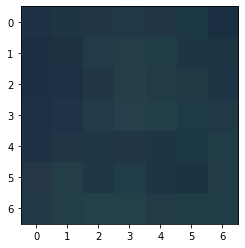

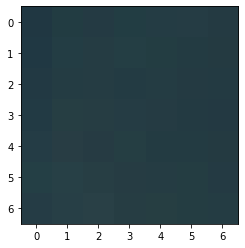

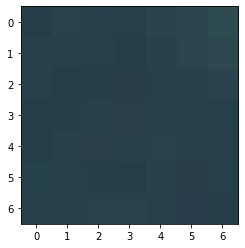

In [45]:
sampled_images = sample_images(0, n=3)

for a in sampled_images:

    try:
        jpg_img = load_image(int(a))[:,:,:3]
        fig = plt.figure()
        fig.set_size_inches(4, 4)
        plt.imshow(jpg_img)
    except:
        continue

### Embeddings

In [64]:
#FEATURES_CROWTHER = os.path.abspath("../data/features/crowther")

#features_bigearthnet = np.load(os.path.join(FEATURES_CROWTHER, 'features_bigearthnet_crowther.npy'))
#features_EuroSAT = np.load(os.path.join(FEATURES_CROWTHER, 'features_EuroSAT_crowther.npy'))
#features_ResNet50 = np.load(os.path.join(FEATURES_CROWTHER, 'features_ImageNet-ResNet50_crowther.npy'))
#features_Resic45 = np.load(os.path.join(FEATURES_CROWTHER, 'features_Resic-45_crowther.npy'))
#features_So2Sat = np.load(os.path.join(FEATURES_CROWTHER, 'features_So2Sat_crowther.npy'))
#features_Tile2Vec = np.load(os.path.join(FEATURES_CROWTHER, 'features_Tile2Vec_crowther.npy'))
#features_UCMerced = np.load(os.path.join(FEATURES_CROWTHER, 'features_UC_Merced_crowther.npy'))
#features_InceptionV3 = np.load(os.path.join(FEATURES_CROWTHER, 'features_InceptionV3_pool_crowther.npy'))

### t-SNE

In [12]:
#print(features_bigearthnet.shape)
#tsne_bigearthnet = TSNE(
#    n_components=2,
#    init='random', # pca
#    random_state=101,
#    method='barnes_hut',
#    n_iter=500,
#    verbose=2
#).fit_transform(features_bigearthnet)

In [47]:
TSNE_CROWTHER = os.path.abspath("../data/features/crowther/TSNE")

tsne_bigearthnet = np.load(os.path.join(TSNE_CROWTHER, 'tsne_bigearthnet_crowther.npy'))
tsne_EuroSAT = np.load(os.path.join(TSNE_CROWTHER, 'tsne_EuroSAT_crowther.npy'))
tsne_ResNet50 = np.load(os.path.join(TSNE_CROWTHER, 'tsne_ResNet50_crowther.npy'))
tsne_Resic45 = np.load(os.path.join(TSNE_CROWTHER, 'tsne_Resic45_crowther.npy'))
tsne_So2Sat = np.load(os.path.join(TSNE_CROWTHER, 'tsne_So2Sat_crowther.npy'))
tsne_Tile2Vec = np.load(os.path.join(TSNE_CROWTHER, 'tsne_Tile2Vec_crowther.npy'))
tsne_UCMerced = np.load(os.path.join(TSNE_CROWTHER, 'tsne_UCMerced_crowther.npy'))
tsne_InceptionV3 = np.load(os.path.join(TSNE_CROWTHER, 'tsne_InceptionV3_crowther.npy'))
tsne_MeanColorSpace = np.load(os.path.join(TSNE_CROWTHER, 'tsne_MeanColorSpace_crowther.npy'))

##### BigEarthNet

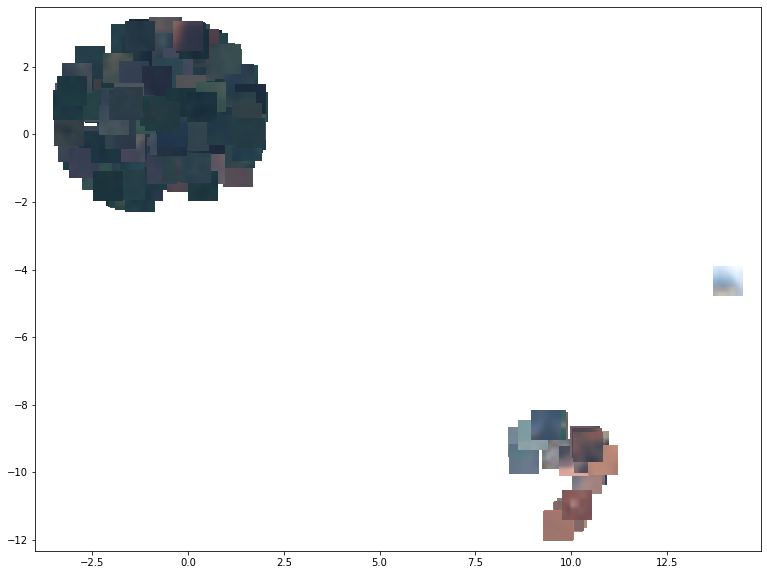

In [48]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_bigearthnet[0:n_imgs,0], tsne_bigearthnet[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])


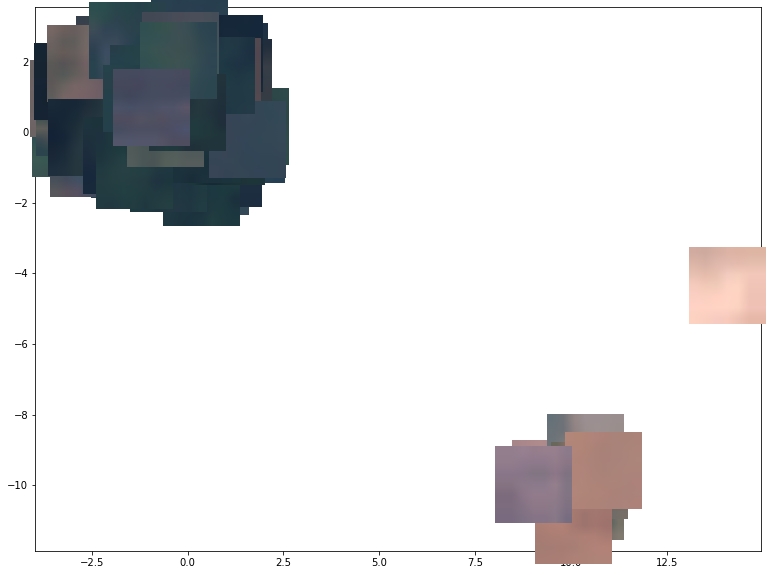

In [68]:
# Subset of images for clustering
n_imgs = 100
offset = 8000
img_shape = (256, 256)

# Plot the subset of images in a two dimensional representation
def imscatter(x, y, images, ax=None, zoom=0.3):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_bigearthnet[offset:offset + n_imgs, 0], tsne_bigearthnet[offset:offset + n_imgs, 1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(offset+i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

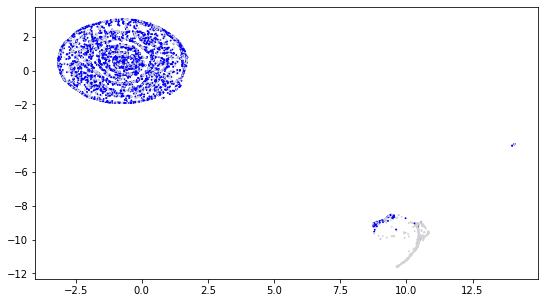

In [61]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(tsne_bigearthnet[:, 0], tsne_bigearthnet[:, 1], c=color, s=0.8, cmap='Scatter');

##### EuroSAT

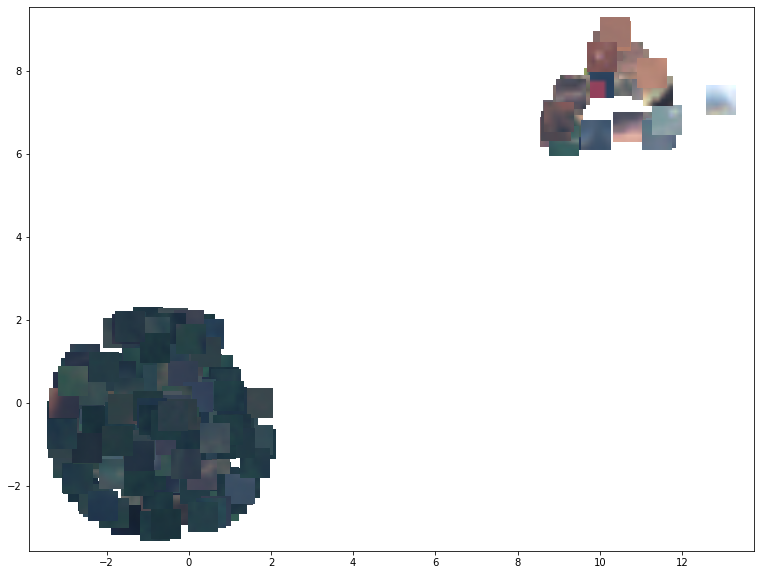

In [69]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_EuroSAT[0:n_imgs,0], tsne_EuroSAT[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])


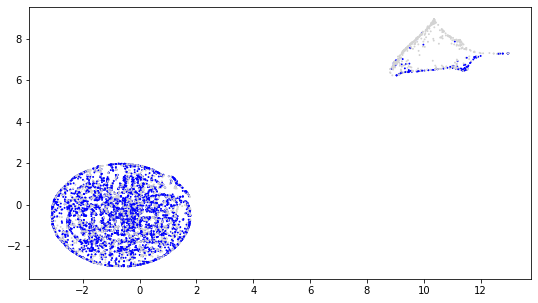

In [70]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(tsne_EuroSAT[:, 0], tsne_EuroSAT[:, 1], c=color, s=0.8, cmap='Scatter');

##### ResNet50

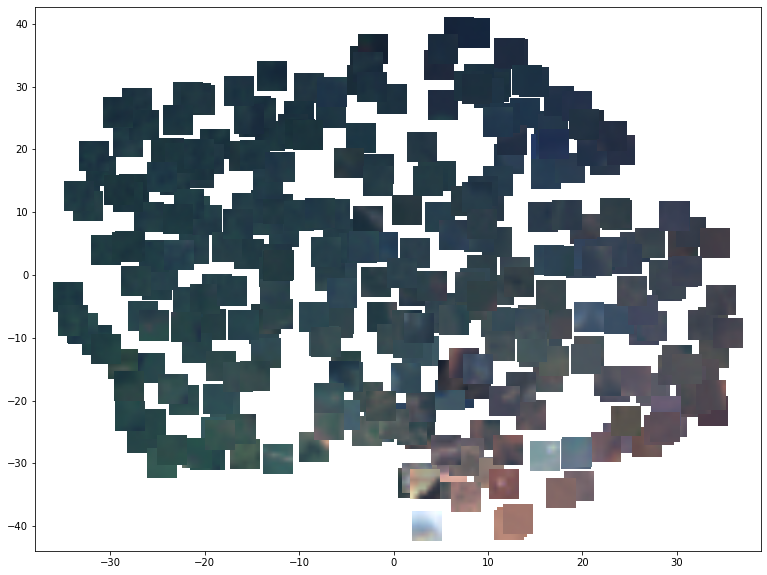

In [71]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_ResNet50[0:n_imgs,0], tsne_ResNet50[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])


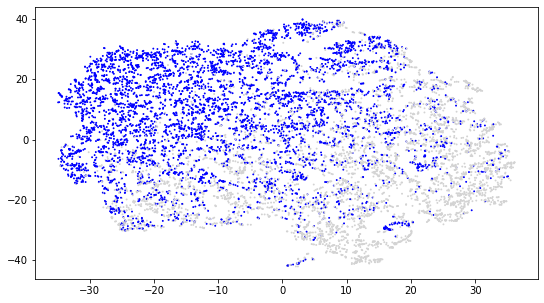

In [72]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(tsne_ResNet50[:, 0], tsne_ResNet50[:, 1], c=color[:], s=0.8, cmap='Scatter');

##### Resic45

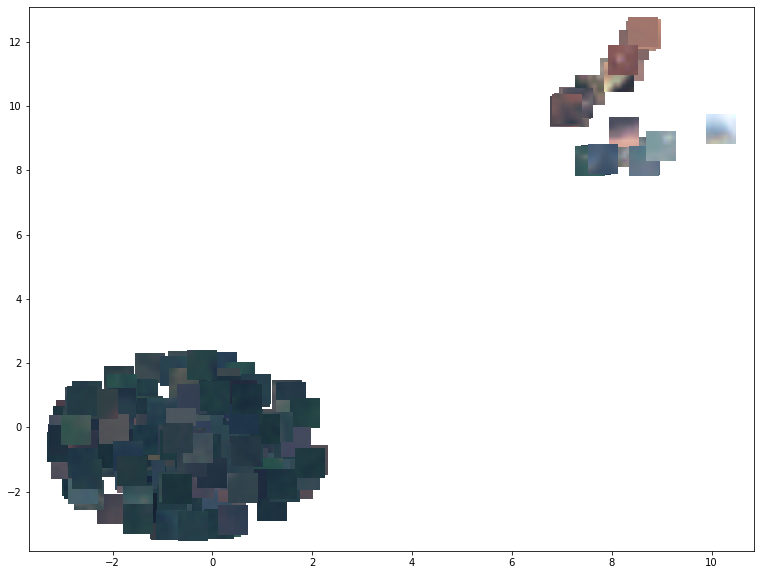

In [73]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_Resic45[0:n_imgs,0], tsne_Resic45[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])


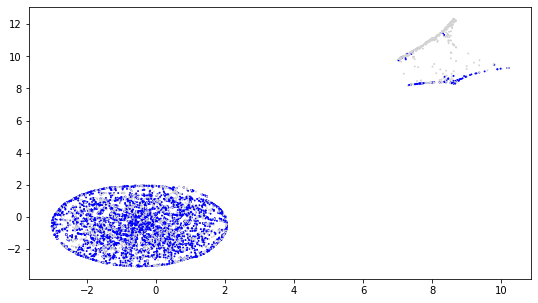

In [74]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(tsne_Resic45[:, 0], tsne_Resic45[:, 1], c=color, s=0.8, cmap='Scatter');

##### So2Sat

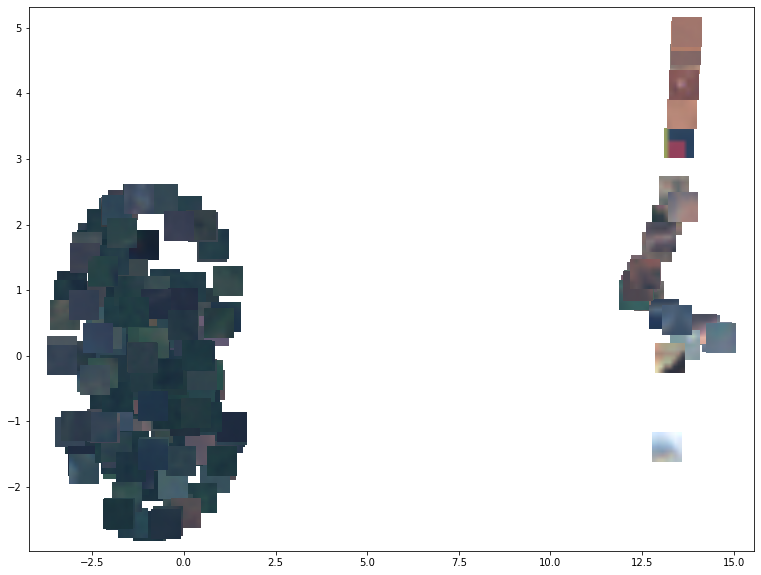

In [75]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_So2Sat[0:n_imgs,0], tsne_So2Sat[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

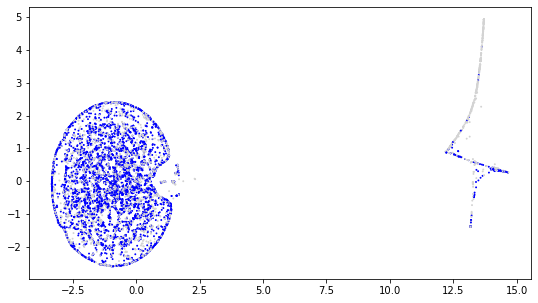

In [76]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(tsne_So2Sat[:, 0], tsne_So2Sat[:, 1], c=color, s=0.8, cmap='Scatter');

##### Tile2Vec

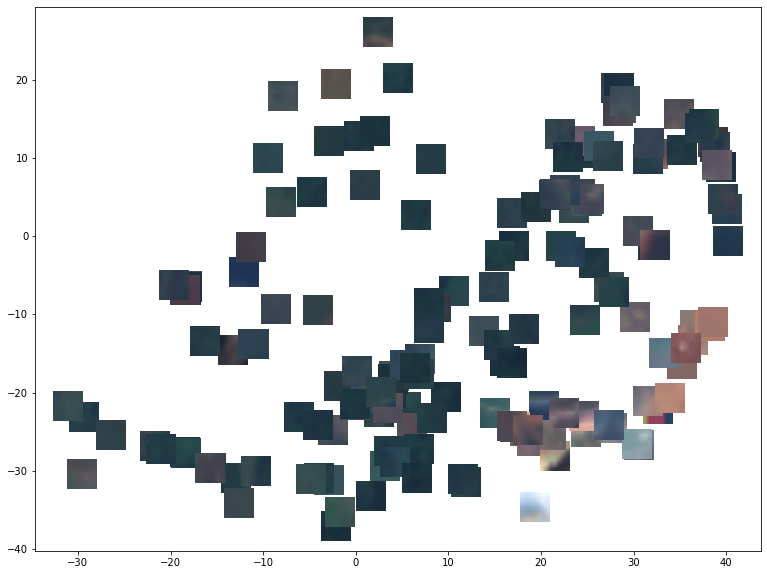

In [77]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_Tile2Vec[0:n_imgs,0], tsne_Tile2Vec[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

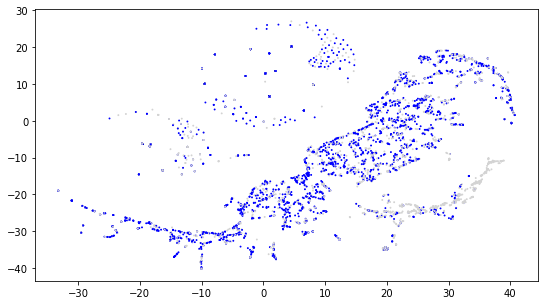

In [78]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(tsne_Tile2Vec[:, 0], tsne_Tile2Vec[:, 1], c=color, s=0.8, cmap='Scatter');

##### UC Merced

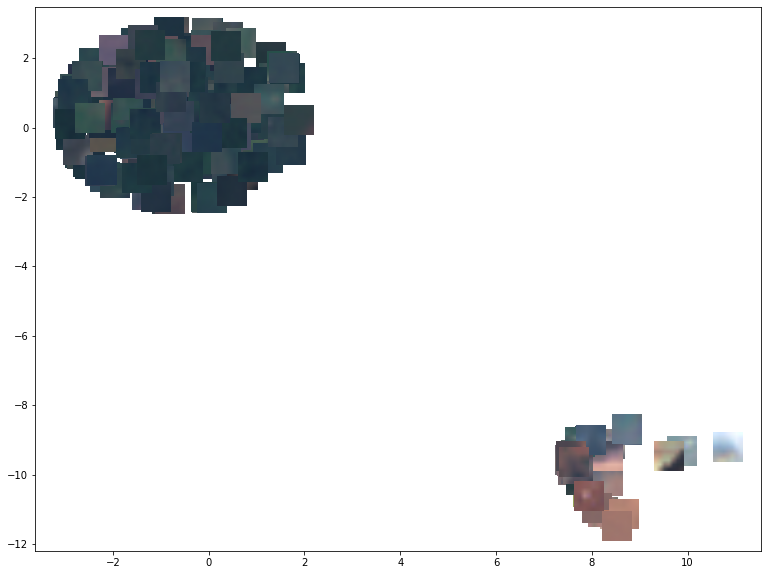

In [79]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_UCMerced[0:n_imgs,0], tsne_UCMerced[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

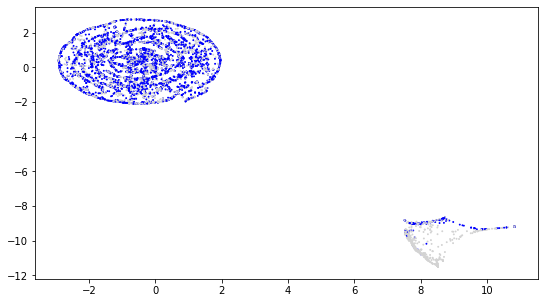

In [80]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(tsne_UCMerced[:, 0], tsne_UCMerced[:, 1], c=color, s=0.8, cmap='Scatter');

##### Inception V3

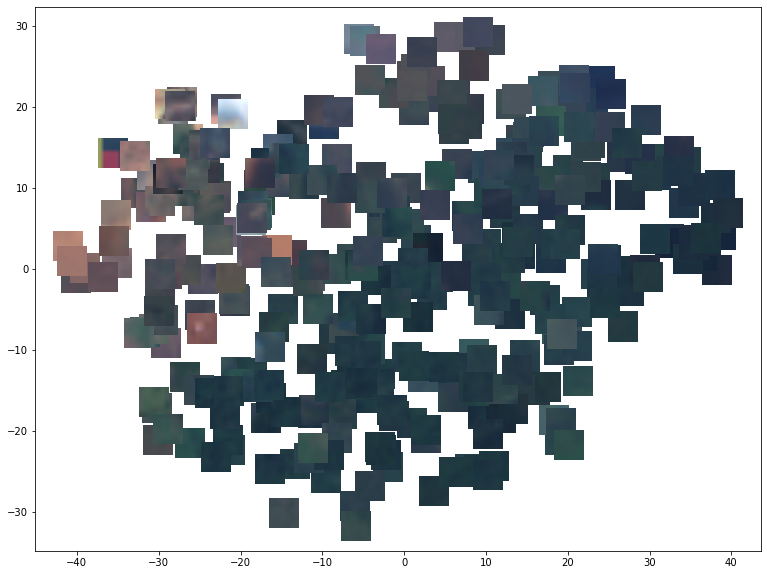

In [81]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_InceptionV3[0:n_imgs,0], tsne_InceptionV3[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

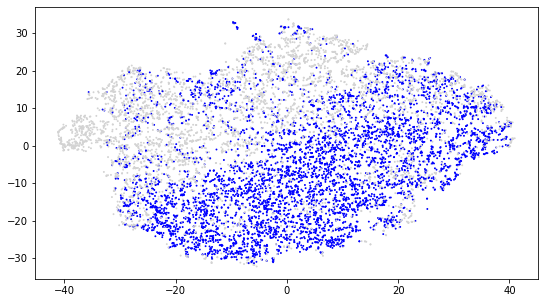

In [82]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(tsne_InceptionV3[:, 0], tsne_InceptionV3[:, 1], c=color, s=0.8, cmap='Scatter');

##### Mean Color Space

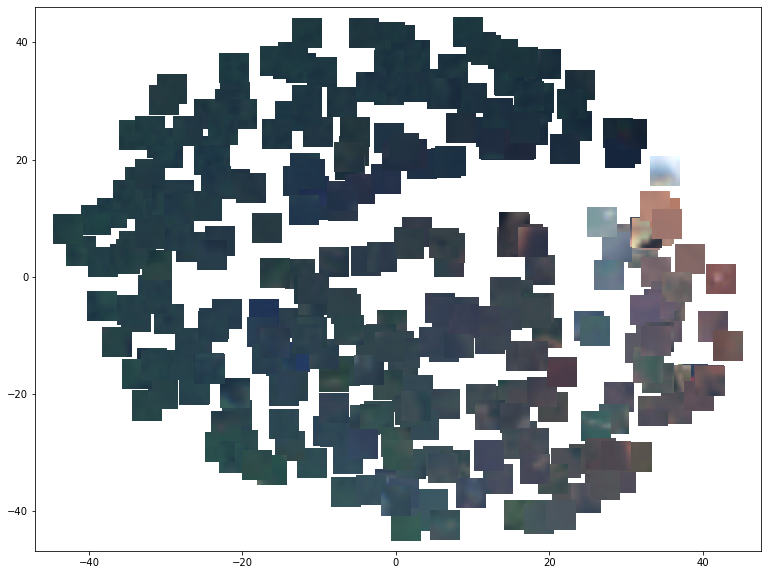

In [84]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(tsne_MeanColorSpace[0:n_imgs,0], tsne_MeanColorSpace[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

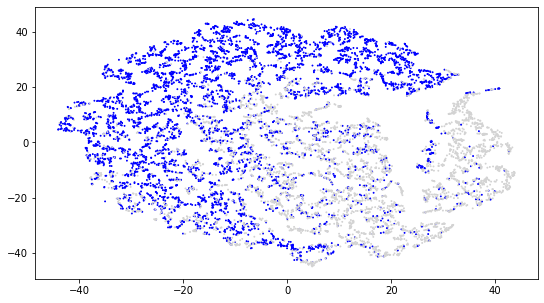

In [85]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(tsne_MeanColorSpace[:, 0], tsne_MeanColorSpace[:, 1], c=color, s=0.8, cmap='Scatter');

### PCA

In [86]:
#pca_bigearthnet = PCA(n_components=2).fit_transform(features_bigearthnet)

In [89]:
PCA_CROWTHER = os.path.abspath("../data/features/crowther/PCA")

pca_bigearthnet = np.load(os.path.join(PCA_CROWTHER, 'pca_bigearthnet_crowther.npy'))
pca_EuroSAT = np.load(os.path.join(PCA_CROWTHER, 'pca_EuroSAT_crowther.npy'))
pca_ResNet50 = np.load(os.path.join(PCA_CROWTHER, 'pca_ResNet50_crowther.npy'))
pca_Resic45 = np.load(os.path.join(PCA_CROWTHER, 'pca_Resic45_crowther.npy'))
pca_So2Sat = np.load(os.path.join(PCA_CROWTHER, 'pca_So2Sat_crowther.npy'))
pca_Tile2Vec = np.load(os.path.join(PCA_CROWTHER, 'pca_Tile2Vec_crowther.npy'))
pca_UCMerced = np.load(os.path.join(PCA_CROWTHER, 'pca_UCMerced_crowther.npy'))
pca_InceptionV3 = np.load(os.path.join(PCA_CROWTHER, 'pca_InceptionV3_crowther.npy'))
pca_MeanColorSpace = np.load(os.path.join(PCA_CROWTHER, 'pca_MeanColorSpace_crowther.npy'))

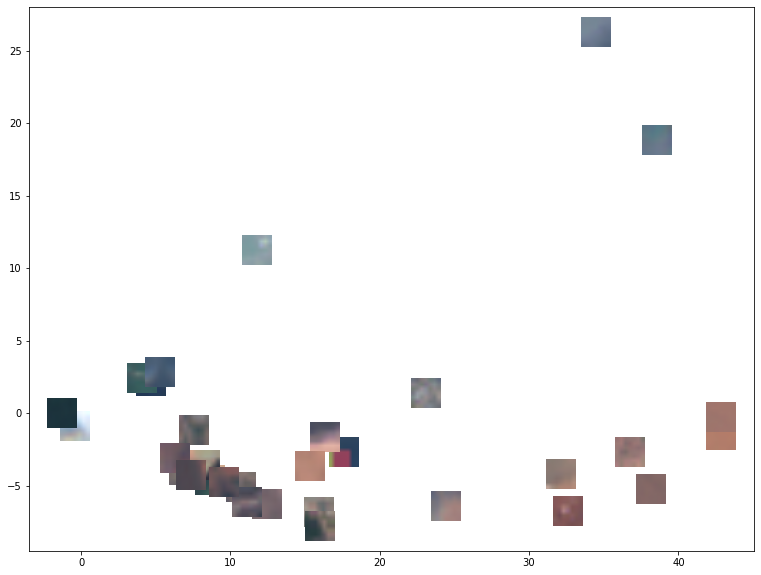

In [90]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_bigearthnet[0:n_imgs,0], pca_bigearthnet[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

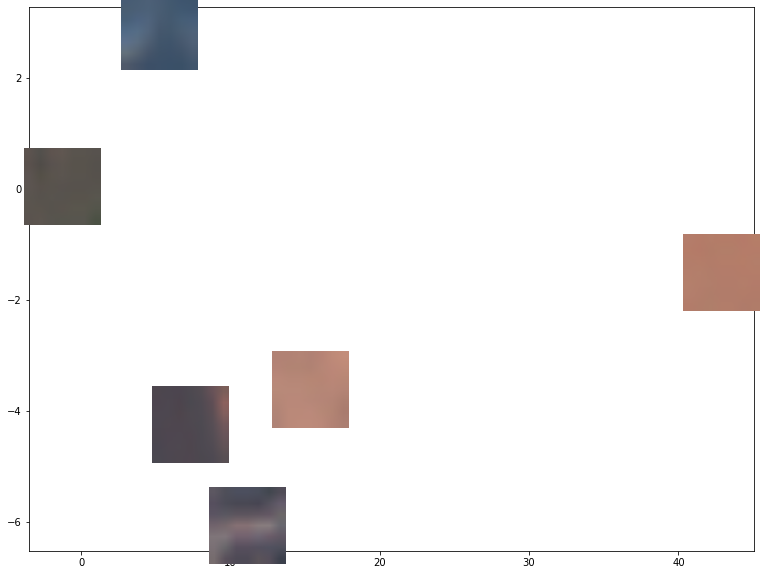

In [91]:
# Subset of images for clustering
n_imgs = 60
offset = 200
img_shape = (256, 256)


# Plot the subset of images in a two dimensional representation
def imscatter(x, y, images, ax=None, zoom=0.3):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_bigearthnet[offset:offset + n_imgs, 0], pca_bigearthnet[offset:offset + n_imgs, 1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(offset+i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

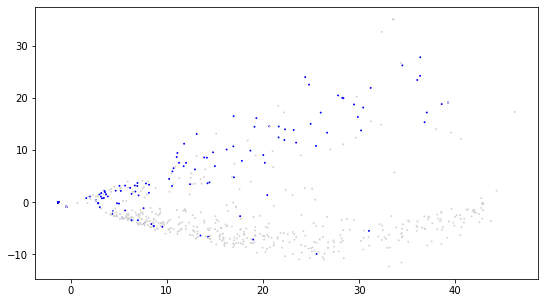

In [92]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(pca_bigearthnet[:, 0], pca_bigearthnet[:, 1], c=color, s=0.8, cmap='Scatter');

##### EuroSAT

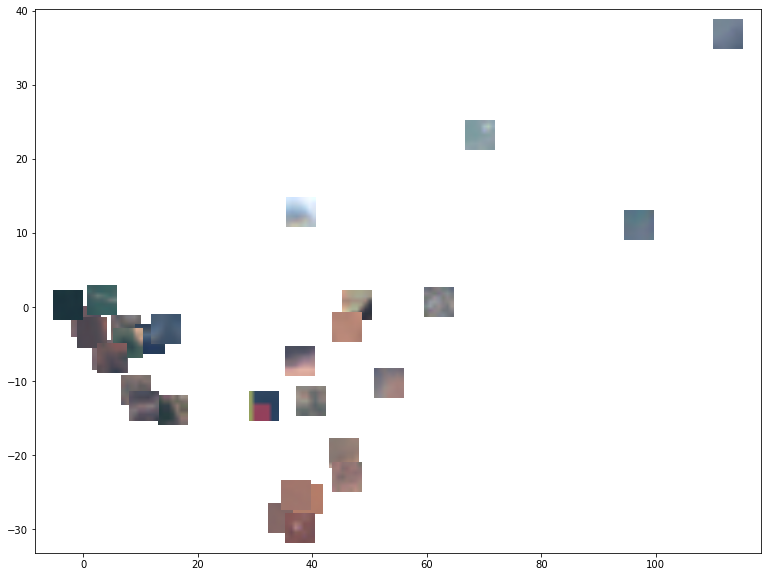

In [93]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_EuroSAT[0:n_imgs,0], pca_EuroSAT[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

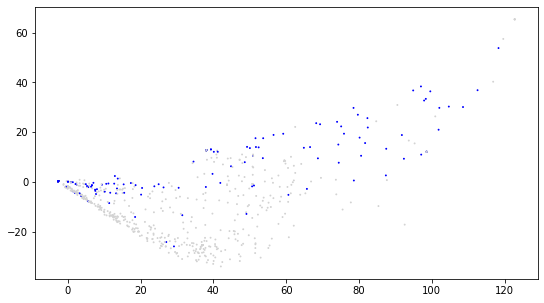

In [94]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(pca_EuroSAT[:, 0], pca_EuroSAT[:, 1], c=color, s=0.8, cmap='Scatter');

##### ResNet50

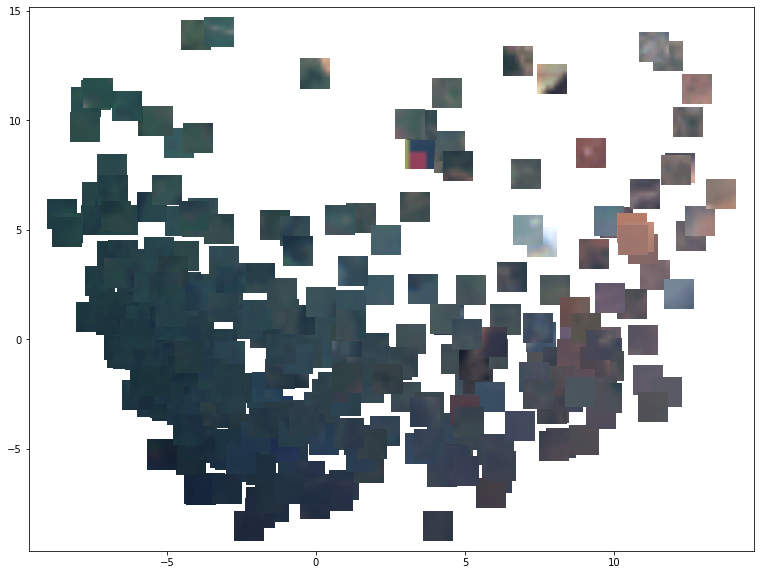

In [95]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_ResNet50[0:n_imgs,0], pca_ResNet50[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 10000.

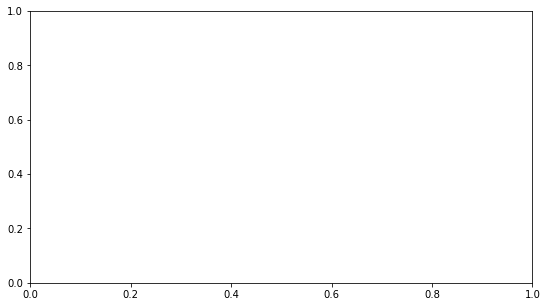

In [96]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(pca_ResNet50[:, 0], pca_ResNet50[:, 1], c=color[:100], s=0.8, cmap='Scatter');

##### Resic45

In [ ]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_Resic45[0:n_imgs,0], pca_Resic45[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

In [ ]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(pca_Resic45[:, 0], pca_Resic45[:, 1], c=color, s=0.8, cmap='Scatter');

##### So2Sat

In [ ]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_So2Sat[0:n_imgs,0], pca_So2Sat[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

In [ ]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(pca_So2Sat[:, 0], pca_So2Sat[:, 1], c=color, s=0.8, cmap='Scatter');

##### Tile2Vec

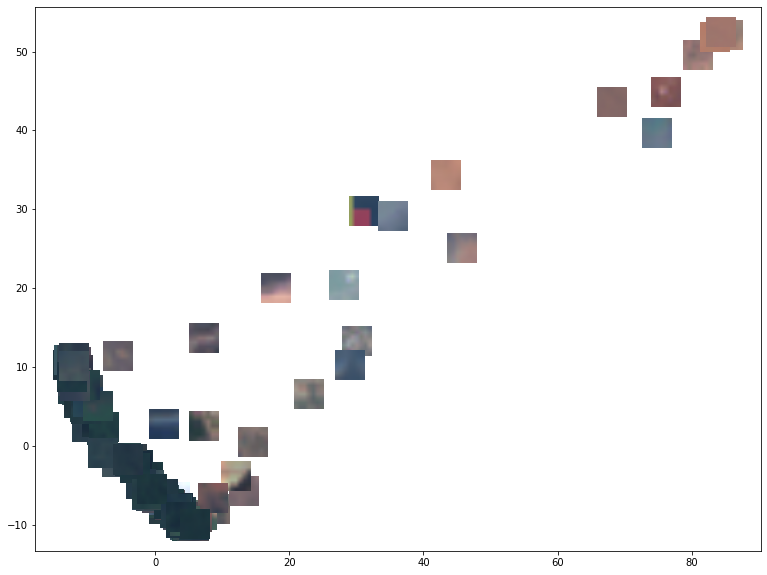

In [97]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_Tile2Vec[0:n_imgs,0], pca_Tile2Vec[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

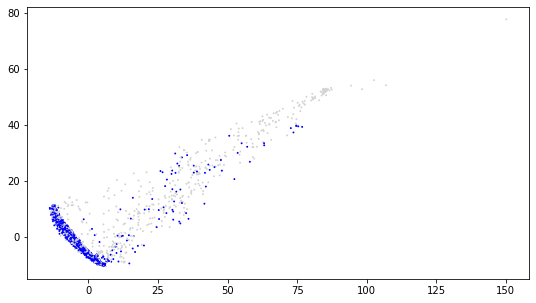

In [98]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(pca_Tile2Vec[:, 0], pca_Tile2Vec[:, 1], c=color, s=0.8, cmap='Scatter');

##### UC Merced

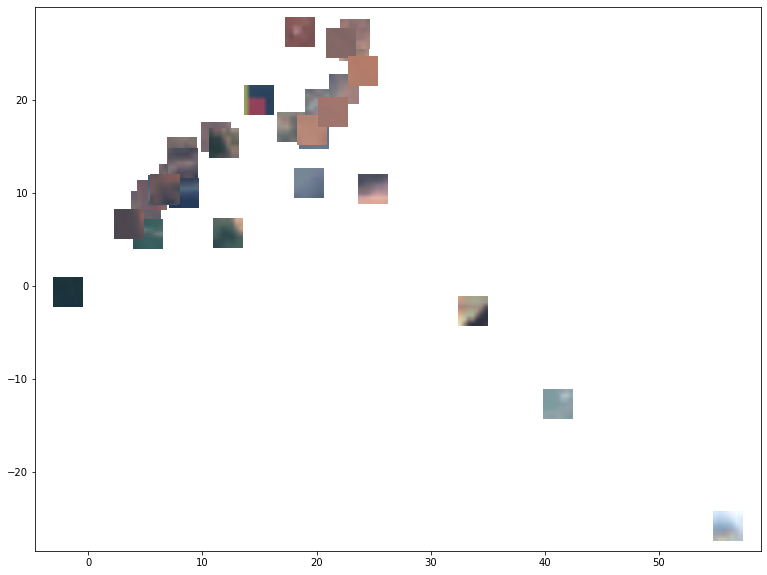

In [99]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_UCMerced[0:n_imgs,0], pca_UCMerced[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

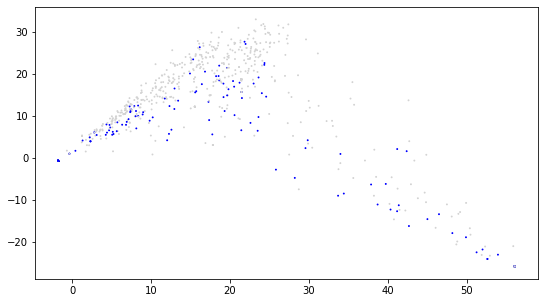

In [100]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(pca_UCMerced[:, 0], pca_UCMerced[:, 1], c=color, s=0.8, cmap='Scatter');

##### InceptionV3

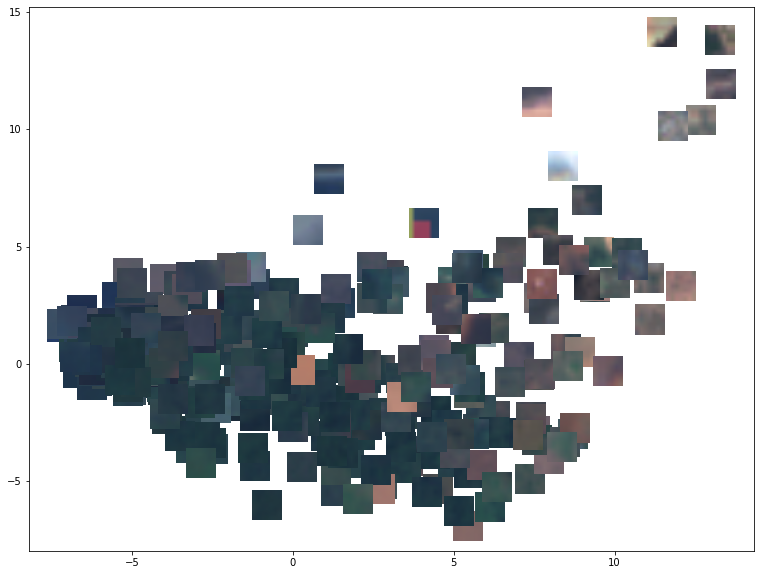

In [101]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_InceptionV3[0:n_imgs,0], pca_InceptionV3[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

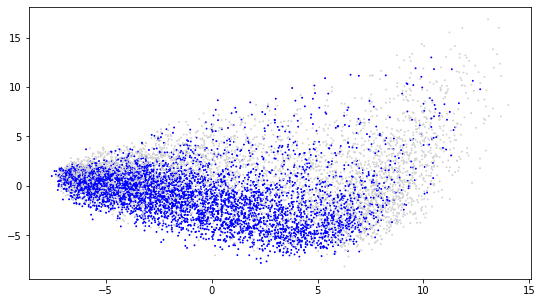

In [102]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(pca_InceptionV3[:, 0], pca_InceptionV3[:, 1], c=color, s=0.8, cmap='Scatter');

##### MeanColorSpace

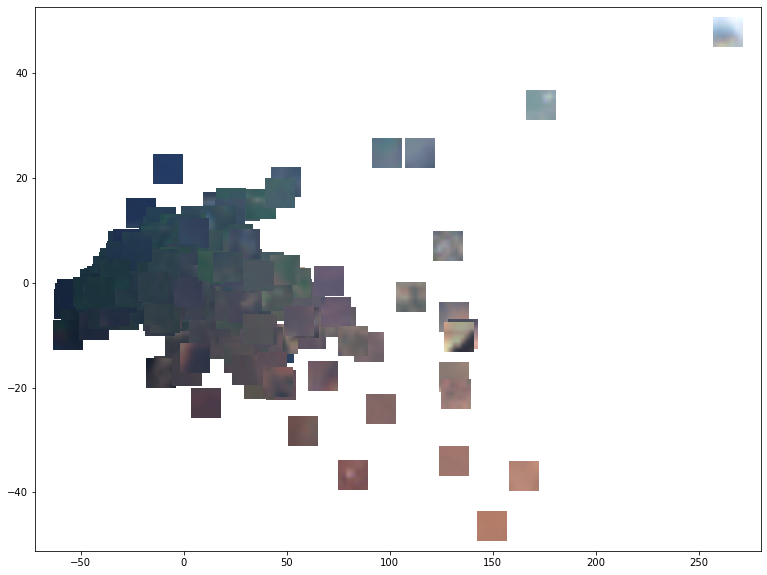

In [103]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(pca_MeanColorSpace[0:n_imgs,0], pca_MeanColorSpace[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

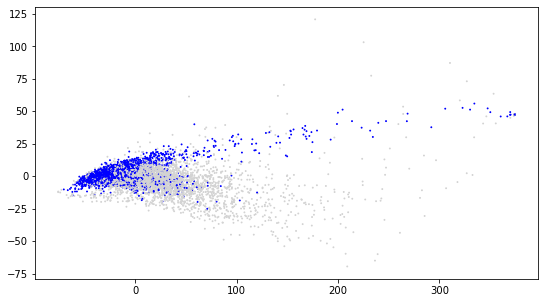

In [104]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(pca_MeanColorSpace[:, 0], pca_MeanColorSpace[:, 1], c=color, s=0.8, cmap='Scatter');

### UMAP

In [42]:
#umap_bigearthnet = umap.UMAP(
#    n_neighbors=100,
#    min_dist=0.0,
#    n_components=2,
#    random_state=42,
#).fit_transform(features_bigearthnet)

In [105]:
UMAP_CROWTHER = os.path.abspath("../data/features/crowther/UMAP")

umap_bigearthnet = np.load(os.path.join(UMAP_CROWTHER, 'umap_bigearthnet_crowther.npy'))
umap_EuroSAT = np.load(os.path.join(UMAP_CROWTHER, 'umap_EuroSAT_crowther.npy'))
umap_ResNet50 = np.load(os.path.join(UMAP_CROWTHER, 'umap_ResNet50_crowther.npy'))
umap_Resic45 = np.load(os.path.join(UMAP_CROWTHER, 'umap_Resic45_crowther.npy'))
umap_So2Sat = np.load(os.path.join(UMAP_CROWTHER, 'umap_So2Sat_crowther.npy'))
umap_Tile2Vec = np.load(os.path.join(UMAP_CROWTHER, 'umap_Tile2Vec_crowther.npy'))
umap_UCMerced = np.load(os.path.join(UMAP_CROWTHER, 'umap_UCMerced_crowther.npy'))
umap_InceptionV3 = np.load(os.path.join(UMAP_CROWTHER, 'umap_InceptionV3_crowther.npy'))
umap_MeanColorSpace = np.load(os.path.join(UMAP_CROWTHER, 'umap_MeanColorSpace_crowther.npy'))

##### BigEarthNet

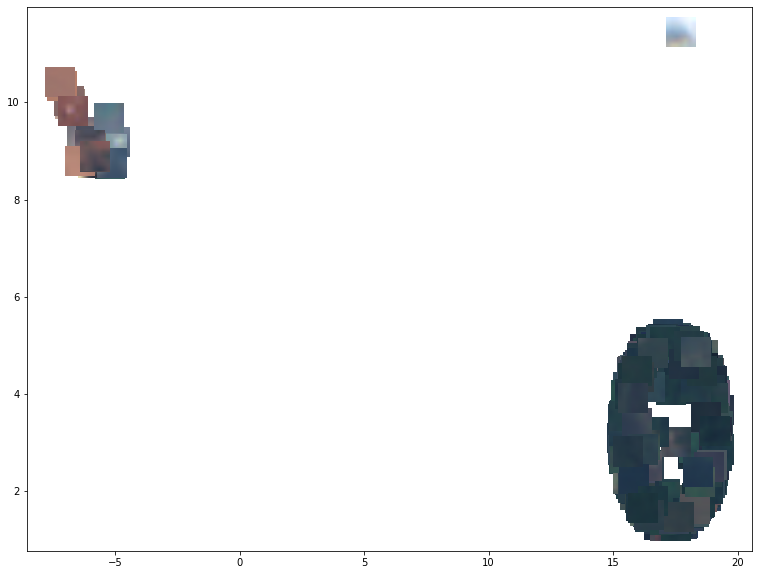

In [106]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(umap_bigearthnet[0:n_imgs,0], umap_bigearthnet[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

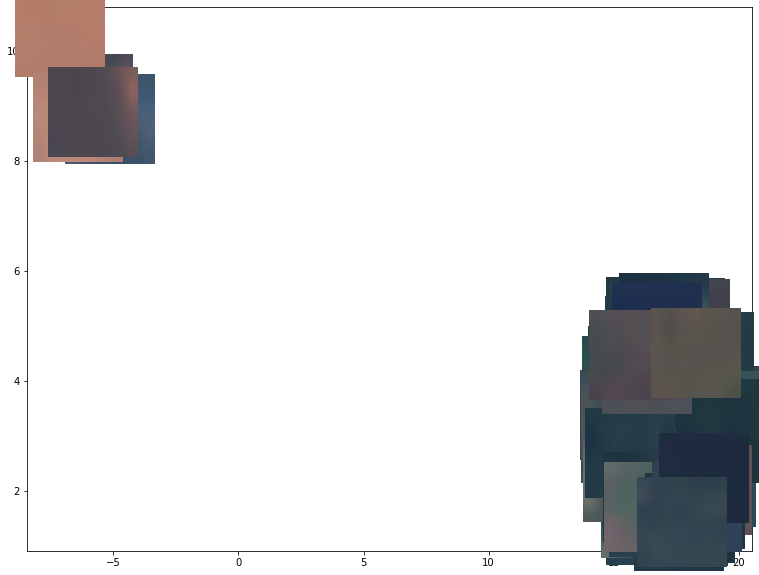

In [107]:
# Subset of images for clustering
n_imgs = 60
offset = 200

# Plot the subset of images in a two dimensional representation
def imscatter(x, y, images, ax=None, zoom=0.3):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(umap_bigearthnet[offset:offset + n_imgs, 0], umap_bigearthnet[offset:offset + n_imgs, 1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(offset+i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

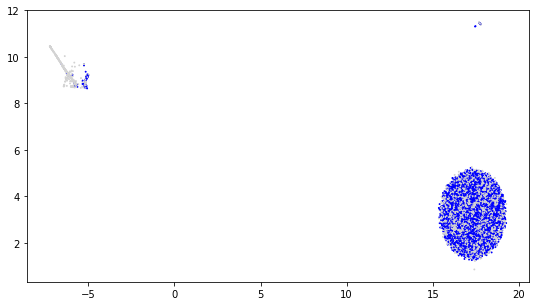

In [108]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(umap_bigearthnet[:, 0], umap_bigearthnet[:, 1], c=color, s=0.8, cmap='Scatter');

##### EuroSAT

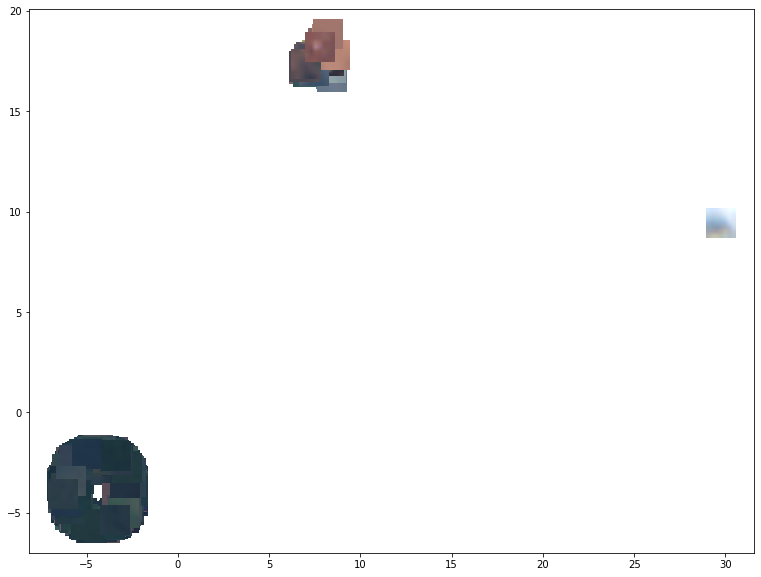

In [109]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(umap_EuroSAT[0:n_imgs,0], umap_EuroSAT[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

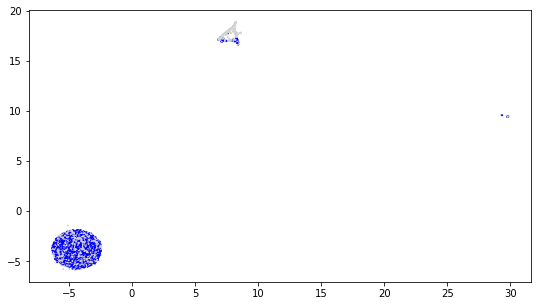

In [110]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(umap_EuroSAT[:, 0], umap_EuroSAT[:, 1], c=color, s=0.8, cmap='Scatter');

##### ResNet50

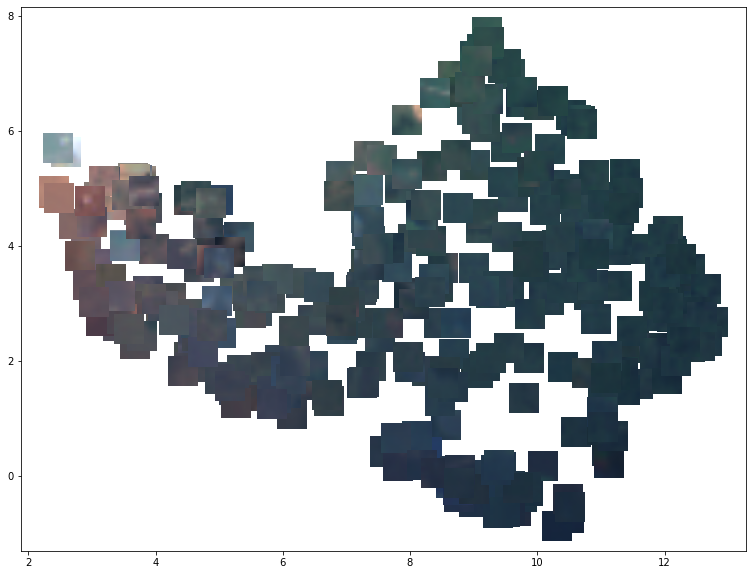

In [111]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(umap_ResNet50[0:n_imgs,0], umap_ResNet50[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 10000.

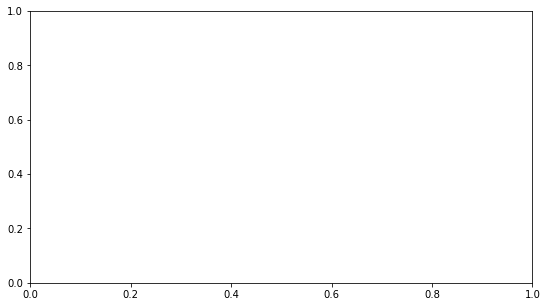

In [112]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(umap_ResNet50[:, 0], umap_ResNet50[:, 1], c=color[:100], s=0.8, cmap='Scatter');

##### Resic45

In [ ]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(umap_Resic45[0:n_imgs,0], umap_Resic45[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

In [ ]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(umap_Resic45[:, 0], umap_Resic45[:, 1], c=color, s=0.8, cmap='Scatter');

##### So2Sat

In [ ]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(umap_So2Sat[0:n_imgs,0], umap_So2Sat[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

In [ ]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(umap_So2Sat[:, 0], umap_So2Sat[:, 1], c=color, s=0.8, cmap='Scatter');

##### Tile2Vec

In [ ]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(umap_Tile2Vec[0:n_imgs,0], umap_Tile2Vec[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

In [ ]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(umap_Tile2Vec[:, 0], umap_Tile2Vec[:, 1], c=color, s=0.8, cmap='Scatter');

##### UC Merced

In [ ]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(umap_UCMerced[0:n_imgs,0], umap_UCMerced[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

In [ ]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(umap_UCMerced[:, 0], umap_UCMerced[:, 1], c=color, s=0.8, cmap='Scatter');

##### InceptionV3

In [ ]:
# Plot the subset of images in a two dimensional representation
n_imgs = 350
#img_shape = (256, 256)
img_shape = (300, 300)

def imscatter(x, y, images, ax=None, zoom=0.1):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

plt.figure(figsize=(13,10))
imscatter(umap_InceptionV3[0:n_imgs,0], umap_InceptionV3[0:n_imgs,1], [cv2.resize(np.load(os.path.join(CROWTHER_DIR, '{}tile.npy'.format(i+1)))[:,:,:3], img_shape) for i in range(n_imgs)])

In [ ]:
color = []
for i in range(len(y_train)):
    if y_train[i,0] > 2:
        color.append('b') #
    else:
        color.append('lightgrey') #other

plt.figure(figsize=(9,5))
plt.scatter(umap_InceptionV3[:, 0], umap_InceptionV3[:, 1], c=color, s=0.8, cmap='Scatter');

## Accuracies

In [113]:
# Splits of the original Tile2Vec dataset for training, validation and testing
SPLIT_TRAIN = 7000
SPLIT_VALIDATE = 8000

In [114]:
# Define label mappings for Snorkle voting for convenience
NEGATIVE = 0
POSITIVE = 1
ABSTAIN = -1

In [115]:
y_test = y_train[SPLIT_VALIDATE:]
y_valid = y_train[SPLIT_TRAIN:SPLIT_VALIDATE]
y_train = y_train[:SPLIT_TRAIN]

print(y_train.shape[0])
print(y_valid.shape[0])
print(y_test.shape[0])

7000
1000
2000


In [158]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def evaluate_LF(LF, y_test, tag, n=100, full_dataset = False, print_evaluation=True):
    #print(namestr(LF, globals()))
    
    if full_dataset:
        n = y_test.shape[0]

    # Evaluate
    tp, fp, tn, fn = 0, 0, 0, 0
    abst = 0
    for idx in range(n):
        pred = LF(idx)
        if pred == 1: 
            if y_test[idx, tag] > 2:
                tp += 1
            else:
                fp += 1
        elif pred == 0:
            if y_test[idx, tag] < 3:
                tn += 1
            else:
                fn += 1
        else:
            abst += 1  

    # Calculate the accuracy of LF
    accuracy = (tp + tn)/(tp + fp + tn + fn)
    if (tp + fp) > 0:   
        precision = tp / (tp + fp)
    else:
        precision = 0
    coverage = (n - abst) / n
    
    if print_evaluation:
        print('TP: ', tp)
        print('FP: ', fp)
        print('TN: ', tn)
        print('FN: ', fn)
        print('abstain: ', abst)
        print('accuracy: ', accuracy)
        print('precision: ', precision)
        print('coverage: ', coverage)
        
    return

### UMAP

In [177]:
# Set polygons within UMAP embedding to cluster/label data for selected labels

label_dict = {}
for i in range(y_test.shape[1]):
    label_dict[i] = label_names[i]

print(label_dict)

# TBD: more precise polygons/bounding boxes including abstaining regions

from shapely.geometry import Point, Polygon

umap_bigearthnet_coords = [[] for i in range(len(unique))]
umap_bigearthnet_coords[0] = [(10, 6), (10, 0), (20, 0), (20, 6)]


umap_InceptionV3_coords = [[] for i in range(len(unique))]
umap_InceptionV3_coords[0] = [(-3, 12), (-3, 17), (6, 17), (6, 12)]


{0: 'vegetation_elementstree_element_cover_label', 1: 'vegetation_elementsshrub_element_cover_label', 2: 'vegetation_elementspalm_element_cover_label', 3: 'vegetation_elementsbamboo_element_cover_label', 4: 'vegetation_elementscrop_element_cover_label', 5: 'infrastructure_elementshouse_element_cover_label', 6: 'infrastructure_elementsother_buildings_element_cover_label', 7: 'infrastructure_elementspaved_road_element_cover_label', 8: 'infrastructure_elementsunpaved_road_element_cover_label', 9: 'water_bodieslake_water_cover_label', 10: 'water_bodiesriver_water_cover_label', 11: 'total_water_bodies_cover_label'}


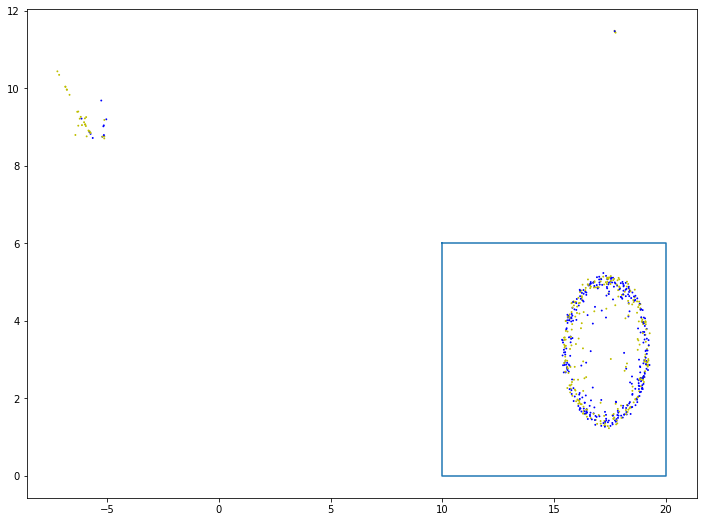

In [178]:
# Display manual clustering of the UMAP embedding

label_id = 0
no_samples = 600

coords = umap_bigearthnet_coords[label_id]
poly = Polygon(coords)

color = []
#for i in range(len(y_train)):
for i in range(no_samples):
    if y_train[i,label_id] > 2:
        color.append('b') #
    else:
        color.append('y') #other

plt.figure(figsize=(12,9))
plt.scatter(umap_bigearthnet[:no_samples, 0], umap_bigearthnet[:no_samples, 1], c=color, s=0.8, cmap='Scatter')
plt.plot(*poly.exterior.xy)

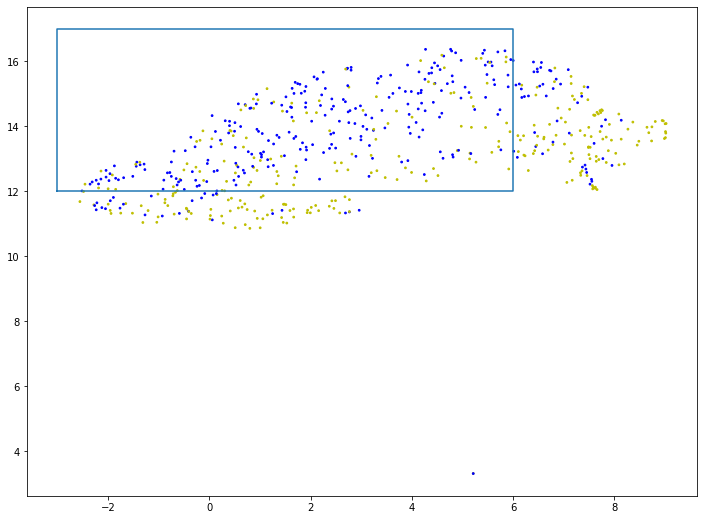

In [179]:
# Display manual clustering of the UMAP embedding

label_id = 0
no_samples = 600

coords = umap_InceptionV3_coords[label_id]
poly = Polygon(coords)

color = []
#for i in range(len(y_train)):
for i in range(no_samples):
    if y_train[i,label_id] > 2:
        color.append('b') #
    else:
        color.append('y') #other

plt.figure(figsize=(12,9))
plt.scatter(umap_InceptionV3[:no_samples, 0], umap_InceptionV3[:no_samples, 1], c=color, s=3, cmap='Scatter')
plt.plot(*poly.exterior.xy)

In [180]:
def vegetation_elementstree_bigearthnet_umap(x):
    i = int(x)
    
    p1 = Point(umap_bigearthnet[i, 0], umap_bigearthnet[i, 1])
    coord = umap_bigearthnet_coords[0]
    poly = Polygon(coord)
    
    if p1.within(poly):
        return POSITIVE
    else:
        return NEGATIVE

In [181]:
evaluate_LF(vegetation_elementstree_bigearthnet_umap, y_test, 0, full_dataset = False)

TP:  47
FP:  39
TN:  7
FN:  7
abstain:  0
accuracy:  0.54
precision:  0.5465116279069767
coverage:  1.0


In [182]:
def vegetation_elementstree_InceptionV3_umap(x):
    i = int(x)
    
    p1 = Point(umap_InceptionV3[i, 0], umap_InceptionV3[i, 1])
    coord = umap_InceptionV3_coords[0]
    poly = Polygon(coord)
    
    if p1.within(poly):
        return POSITIVE
    else:
        return NEGATIVE

In [183]:
evaluate_LF(vegetation_elementstree_InceptionV3_umap, y_test, 0, full_dataset = False)

TP:  27
FP:  23
TN:  23
FN:  27
abstain:  0
accuracy:  0.5
precision:  0.54
coverage:  1.0
